$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

# Introduction

The goal of this workshop is to get you familiar with how Quantum Gates work.

You'll get to walk through the process of building your own Quantum Logic Gate and being able to see its operation.

# What is a Qubit?

A **qubit** is the fundamental unit of quantum computation, similar to what we like to consider a **bit** in our classical computers.

Unlike a traditional bit, the qubit exhibits quantum mechanical properties like those we covered in our last meeting:

* Superposition
* Entanglement

These properties can be used to make certain traditional problems that were considered infeasible or too slow on current computers possible and even faster.

Before we can jump into gates, there are couple important pieces of information I'd like to expand upon from our prior meeting

# Wave Functions

The **Wave Function** is a kind of function that encapsulates everything *we want to know* about any quantum system, be it a singular particle or some group of particles. 

It's usually denoted by the greek letter $\Psi$ or $\psi$ by itself.

The stuff "we want to know" about a quantum system are more formally known as **observables** such as momentum, kinetic energy, position, stuff we can quite literally see for ourselves. 

Due to the fact that the wave function can encode all this knowledge, you'll generally have to pick what you're measuring through an **operator**, which is a big part of how Quantum Gates work. 

# Mathematical Formalism

There are a couple odd features of the wave function that make it a little less elegant than the explanation above but is useful knowledge to have moving forward. Furthermore, you'll need a firm grasp of some of the mathematics to understand more complex examples.

Firstly, Wave functions are **complex valued** meaning they don't just give you some real number that directly corresponds to the physical world. Instead, it gives you a complex number which, after further manipulation, will give you the *probability* or *probability density* of an observable having a certain value. 

Secondly, wave functions are **normalized** meaning that if you take the absolute value of the function and square it, then integrate over the function from $-\infty$ to $\infty$, the result is guaranteed to be 1. 

That's quite a lot of information so let's look at an example.

Let's imagine that I have a quantum system described by a wave function that takes two values, $x$ for position and $t$ for time:

$$\Psi(x,t)$$

At this point in time, the function will just spit out some complex value.

If you remember from above, we said that if we perform some manipulation we'll get the actual probability/probability density we're interested in:

$$\left\lvert\Psi(x,t)\right\rvert^2 = \Psi(x,t)^*\Psi(x,t) = \rho(x,t)$$

where the asterisk is the complex conjugate of the function.

Then, the probability that the particle is at some location $x$ within a specified interval is:

$$P_{a\leq b\leq c}(x) = \int_a^b \rho(x,t)dx$$

This leads to that whole normalization condition:

$$\int_{-\infty}^{\infty}\left\lvert\Psi(x,t)\right\rvert^2 = 1$$

The reason being is that if we sum up all the probabilities of where the particle can exist, there is a 100% chance it's floating around somewhere.

## Vector Space and Hilbert Space

In the last meeting, I also briefly went over what **Vector Space** and **Hilbert Space** were. 

The idea of vector spaces is incredibly powerful because as we long as we can define "stuff" to satisfy the set of rules of a vector space needs, we can use linear algebra to handle complex things like wave functions and quantum states!

I wanted to give a more formal introduction here just to help solidify your understanding.

A vector space is a collection, $V$ of vectors and two operators ($+$ and $\cdot$) such that a set of rules holds for them.

I will not list out all the rules (I encourage you to refer to the QCC (Quantum Computing Codex)) but the great majority of them are what you expect them to be such as:

$$\vec u + \vec v = \vec v + \vec u$$

The way you add vectors shouldn't matter (you should still get the same result)

$$(\vec u + \vec v) \in V$$

Adding two vectors in the set of vectors $V$ should produce another vector that is in $V$. 

The powerful thing about vector spaces is that the "vectors" don't have to just be the vectors we're familiar with in Geometry and Physics. Vectors include things like polynomials, matrices, etc. __ANY SET OF THINGS__ that can satisfy a set of base rules constitute a vector space.

**Hilbert Space** is a kind of **Vector Space** that has the same base rules as any **Vector Space** but adds some rules that line up with a lot of the "quirks" of Quantum Mechanics (like normalizing the wave function.)

**Hilbert Space** itself is split into two other variations, **Finite Dimensional Hilbert Space** and **Infinite Dimensional Hilbert Space**.

We'll be focusing on **Infinite Dimensional Hilbert Space** for several reasons:

1. Vector space of complex-valued functions (sound familiar?)
2. We have an infinite number of basis elements to create other elements from
3. All functions are **square integrable**

The second point seems a little odd but basically, we're familiar of the idea of using a set of vectors (basis vectors) capable of making every other vector. In Infinite Dimensional Hilbert Space, we're given an infinite number of basis functions (remember, vector spaces can be defined for anything that follows the rules) to make other functions from. In our case, wave functions!

**square integrable** means the following property must be true:

$$ \int_{-\infty}^\infty \left|f(x)\right|^2 = \text{finite} $$

We are guaranteed a finite value for such integrals. 

## A Little Primer on Dirac Notation

Dirac Notation or "Bra-Ket" notation is a way of working with vectors in Hilbert Space.

There are a good number of features about it but I want to direct your attention to just two of them for this workshop.

Whenever we have a vector like:

$$ \vec x = \begin{bmatrix} 1 \\ 5 \\ 10 \\ \end{bmatrix} $$

We just represent it with the following:

$$ \ket{x} $$

The $\ket{}$ is known as a **ket** and represents a column vector. The actual value inside the $\ket{}$ symbol is just a label for your convenience, you could have put the word "stuff" in the ket but we like to choose labels that make sense to us.

If we have a matrix defined like so:

$$ A =
\begin{bmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
    7 & 8 & 9 \\
\end{bmatrix}
$$

We can multiply the ket with the matrix like so:

$$ A\ket{x} $$

And that's it for Dirac Notation!

# Qubits with Dirac Notation

Remember when we said that all quantum systems were representable by wave functions? Do you also remember that we can use Hilbert Space to manipulate quantum states/wave functions with linear algebra instead of gnarly integrals/differential calculus?

Now it all comes together.

Qubits are actually represented as a *linear combination* of two basis vectors. The vectors are unit (length 1) and orthogonal (perpendicular) to each other. Remember though, that the two basis vectors could easily be two other wave functions and that the qubit __ITSELF__ is described by a wave function!

You'd represent it like so:

$$ \ket{\psi} = a\ket{0} + b\ket{1} $$

Where

$$ \ket{0} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $$
$$ \ket{1} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} $$

and $a$ and $b$ must satisfy the following:

$$ \left| a \right|^2 + \left| b \right|^2 = 1 $$

This seemingly innocent mathematical expression already shows the qubit's ability for *superposition*, the ability to be in multiple states (in this case, some combination of the 0 and 1 states) at once as we manipulate the probability the qubit will "collapse" into $\ket{0}$ or $\ket{1}$ through $a$ and $b$ upon measurement. You can think of $\ket{0}$ and $\ket{1}$ as the analogues to our digital 1's and 0's.

During computation, we can exploit superposition but to extract an answer we have to make an observation which collapses the quantum system into either the 0 or 1 state.

# Simple Math With `Numpy`
Let's give a try at constructing some of these vectors and matrices in code. You'll need this knowledge to actually build your own quantum gates from scratch.

We're using Python as our language of choice with help from the `numpy` package to construct vectors and matrices and let us perform standard linear algebra operations

In [1]:
# import numpy 
import numpy as np

In [2]:
# Create a vector with three elements
np.array([1, 2, 3])

array([1, 2, 3])

In [3]:
# Store the vector in a variable
v = np.array([1, 2, 3])

In [4]:
# Create a 3 x 3 matrix
np.matrix([[1,2,3], [4,5,6], [7,8,9]])

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [5]:
# Store the matrix
m = np.matrix([[1,2,3], [4,5,6], [7,8,9]])

In [6]:
# Multiply the vector by the matrix
m.dot(v)

matrix([[14, 32, 50]])

# Going Quantum with `qutip`

`qutip` is a Python library for simulating quantum systems. Its main focus isn't really Quantum Computing (although it provides a great number of tools oriented towards it). 

We're going to create a simple Qubit in the $\ket{1}$ state like so:

In [7]:
# import qutip
from qutip import *

In [8]:
# give the qubit an initial state
ket_one = np.array([0, 1])

In [9]:
# create the "Quantum Object" (our qubit)
q = Qobj(ket_one)
q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

# Operators and Gates

The notation presented earlier to multiply a matrix with a ket looked like this:

$$ A\ket{x} $$

This operation has a direct analogue to Quantum Mechanics.

In traditional quantum mechanics, the operators would give you some value of a quantum system's energy, momentum, etc. 

For qubits, they just modify the state of the qubit, which literally means taking the vector that represents the qubit and multiplying it by a matrix.

In the context of Quantum Computing, the operators are called **gates**, where you feed in a qubit and then you get some modified form of it out. 

Gates have two properties you should be aware of:

1. __Reversability__ (Mostly)

Putting a qubit through a gate and then putting it through the same gate again completely reverses the operation!

This is in contrast to classical computing where if you put data through a logic gate, you permanently lose the ability to return to the original state of the data

Note that this holds for any gates that change the probability of the qubit's collapse into the 1 or 0 basis. For those that don't, this rule doesn't apply (an example will be provided later on)

In [10]:
# This example shows two binary values being OR'd together
# Note that this is NOT reversible because I can't tell what "a" and "b" were solely from the output value
a = 0b11
b = 0b01
print(bin(a | b))
# To really drive the point home, this configuration gives the same output but uses 
# dfferent inputs
a = 0b00
b = 0b11
print(bin(a | b))

0b11
0b11


2. __Unitary__

The matrix that the gate is represented by must satisfy the property:

$$U^{\dagger }U=UU^{\dagger }=I$$

The little floating "dagger" next to $U$ means you have to take the **conjugate transpose** (also known as the Hermitian Conjugate in Quantum Mechanics). 

The **conjugate transopse** means that given a matrix, you take the conjugate of each element (flip the sign in front of the imaginary component) and then transpose it (flip the rows and columns). The formula in general states that taking the conjugate transpose creates the inverse of the matrix, which, when multiplied in any order with the original matrix produces the identity matrix.

The example code should help explain some of the properties.

In [11]:
# Create a matrix again
# For imaginary values, note that we use "j" instead of "i"
m = np.matrix([[0, -1j], [1j, 0]])

In [12]:
# Let's look at what the conjugate does
np.conjugate(m)

matrix([[ 0.-0.j, -0.+1.j],
        [ 0.-1.j,  0.-0.j]])

In [13]:
# Let's look at what transpose does
m.T

matrix([[ 0.+0.j,  0.+1.j],
        [-0.-1.j,  0.+0.j]])

In [14]:
# Now let's put it all together
np.conjugate(m).T

matrix([[ 0.-0.j,  0.-1.j],
        [-0.+1.j,  0.-0.j]])

In [15]:
# Is this matrix Unitary? Let's find out
np.conjugate(m).T * m

matrix([[1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]])

In [16]:
# Just to be safe...
m * np.conjugate(m).T

matrix([[1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]])

In [17]:
# Fortunately, numpy has a built-in way of getting the Hermitian Conjugate
m.H

matrix([[ 0.-0.j,  0.-1.j],
        [-0.+1.j,  0.-0.j]])

# Applying Gates to Qubits
Let's go ahead and combine our knowledge of gates to qubits

In [18]:
# Create a qubit in the "1" state
q = Qobj(np.array([0, 1]))
q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [19]:
# Create an X gate, this gate inverts the qubit so if it was in "1", it goes to "0" and vice versa
x_matrix = np.matrix([[0, 1], [1, 0]])
X = Qobj(x_matrix)
X

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [20]:
# Apply the gate
X * q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [21]:
# Prove the property of reversability
X * X * q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

Congratulations! You've built your first Single Qubit Quantum Gate! 
The X gate isn't the only gate out there, check this one out:

In [22]:
# Create a Hadamard gate, this gate puts the qubit in a superposition between "1" and "0"
# This means that upon observation, there's a perfect 50-50 split in chances between getting 
# a 1 or a 0
h_matrix = 1/np.sqrt(2) * np.matrix([[1, 1], [1, -1]])
H = Qobj(h_matrix)
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

In [23]:
# Make sure the qubit is in "1", where we left it last time
q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [24]:
# Appply the gate
H * q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.70710678]
 [-0.70710678]]

In [55]:
# Let's prove that it truly has a 50-50 chance of being the "0" or "1" vector
#
# Remember that qubits are represented through a|0> + b|1> where
# |a|^2 + |b|^2 = 1
# Looking at the vector above, we can take the values and do the following:
abs(0.707)**2 + abs(-0.707)**2
# Due to rounding errors, we won't get an answer that's exactly 1 but should be close enough
# convince us of the validity of the relationship

0.9996979999999999

In [58]:
# Furthermore, we can check the chance the qubit will be in 0 or 1 by isolating and 
# calculating each term
print("Probability of 0:", abs(0.707)**2)
print("Probability of 1:", abs(-0.707)**2)

Probability of 0: 0.49984899999999993
Probability of 1: 0.49984899999999993


In [25]:
# Verify reversability
H * H * q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

# Visualizing Single Qubit Operations

There's a nice way to visualize the state of the qubit as it undergoes these gate operations by plotting the qubit vector on something called a **Bloch Sphere**. 

The Bloch Sphere is quite literally a sphere, where each point on its surface graphically shows the superposition state (does it "lean" more towards $\ket{1}$ or $\ket{0}$)?

If this is our original way of expressing the state of the qubit:
$$ \ket{\psi} = a\ket{0} + b\ket{1} $$

We can, through manipulation, acquire this formula:
$$ \ket{\psi} = \sin\left(\frac{\theta}{2}\right)\ket{0} + e^{i\phi}\sin\left(\frac{\theta}{2}\right)\ket{1}$$

Which maps out like so:
![](img/Bloch-sphere-representation-of-a-qubit.jpeg)

When the vector is closer to one basis than the other ($\ket{0}$ vs $\ket{1}$) it means that upon measurement, your chances of getting a certain basis state lean more towards that state than the other.

The ability to show a qubit state on a Bloch Sphere is also available in `qutip` and can be done like so:

In [26]:
# Import matplotlib for graphing/visualization libraries
import matplotlib.pyplot as plt

In [27]:
# Create a Bloch sphere instance
bloch_sphere = Bloch()

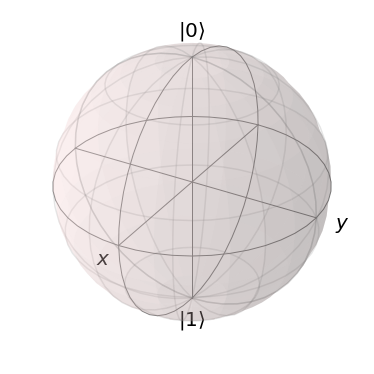

In [28]:
# Plot the sphere
bloch_sphere.show()

Let's go ahead and visualize the two basis states $\ket{1}$ and $\ket{0}$

In [29]:
# Create the basis states
basis_1 = Qobj(np.array([0, 1]))
basis_0 = Qobj(np.array([1, 0]))

In [30]:
# Feed the states into our bloch sphere
bloch_sphere.add_states(basis_1)
bloch_sphere.add_states(basis_0)

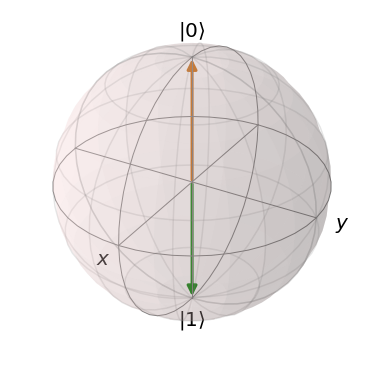

In [31]:
# Display the sphere
bloch_sphere.show()

We can see the when we have our qubits in the basis states, they point at exactly opposite ends of the sphere. Let's see what happens if we put the qubit into a perfect 50-50 superposition between 1 and 0 using the Hadamard Gate we made earlier.

In [32]:
# clear the sphere
bloch_sphere.clear()

In [33]:
# verify that the qubit we used before is in the |1> state 
q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [34]:
# Store the result of applying the gate
hadamard_applied_q = Qobj(H * q)

In [35]:
# Add the resulting state to the Bloch Sphere
bloch_sphere.add_states(hadamard_applied_q)

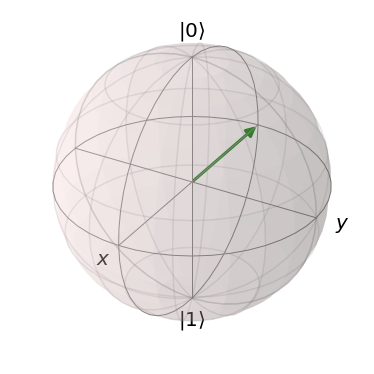

In [36]:
# Plot the sphere
bloch_sphere.show()

Note that the vector lays perfectly inbetween the basis states, meaning that if we "measured" the system it would have a 50-50 chance of collapsing into the 0 or 1 state.

Let's confirm the reversability of the gate by applying the Hadamard yet again to the previous result.

In [37]:
# Apply the Hadamard on the qubit state from last time
reversed_hadamard_q = Qobj(H * hadamard_applied_q)

In [38]:
# Clear the sphere of the previous state
bloch_sphere.clear()

In [39]:
# add the new state to the sphere
bloch_sphere.add_states(reversed_hadamard_q)

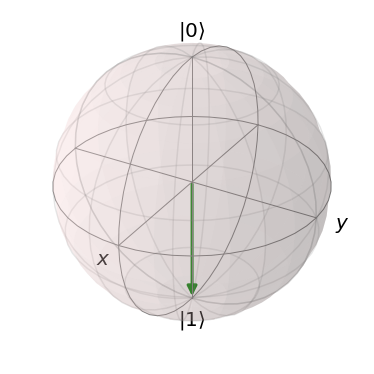

In [40]:
# display the sphere
bloch_sphere.show()

Note that we're now back where we started ( $\ket{1}$ ), thus proving the reversability of the gate.

# More Advanced Examples

There are much more than Hadamard and X gates available for usage on singule qubits:

![](img/800px-Quantum_Logic_Gates.png)

We'll ignore the multi-qubit gates as those are planned for the next workshop but let's try implementing one last gate, the `T` gate which has the following matrix associated with it:

$$ T =
\begin{bmatrix}
1 & 0 \\
0 & e^{\frac{i\pi}{4}} \\
\end{bmatrix}
$$

In [41]:
# Create the T gate matrix
t_matrix = np.matrix([[1, 0], [0,np.exp(( 1j *np.pi)/4)]])
t_matrix

matrix([[1.        +0.j        , 0.        +0.j        ],
        [0.        +0.j        , 0.70710678+0.70710678j]])

In [42]:
# Create the T gate iself
T = Qobj(t_matrix)
T

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]

In [43]:
# Verify we haven't accidentally changed the qubit permanently during any operation
q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [44]:
# Apply T on q
T_applied_state = Qobj(T * q)
T_applied_state

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.        +0.j        ]
 [0.70710678+0.70710678j]]

In [45]:
# Clear the bloch sphere of any existing states previously displayed
bloch_sphere.clear()

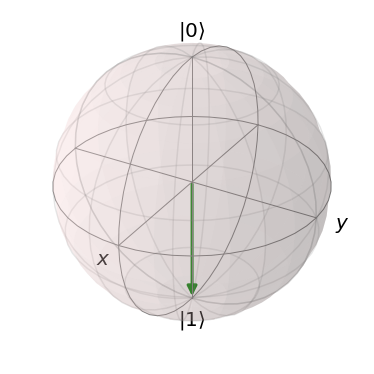

In [46]:
# Add the state to the sphere, then display it
bloch_sphere.add_states(T_applied_state)
bloch_sphere.show()

Well, that's a little underwhelming, isn't it? Most of the time, you'll need the qubit to be in some superposition state (compared to a basis state) to really observe the effect of a gate. 

Let's put the Hadamard to use again. This time, to make things more efficient we're going to overwrite the qubit state variable in Python instead of duplicating the variable.

In [47]:
# clear the bloch sphere
bloch_sphere.clear()

In [48]:
# Remind ourselves how to set a qubit in the |1> state
q = Qobj(np.array([0, 1]))
q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [49]:
# Apply the Hadamard, followed by the T gate
q = T * H * q

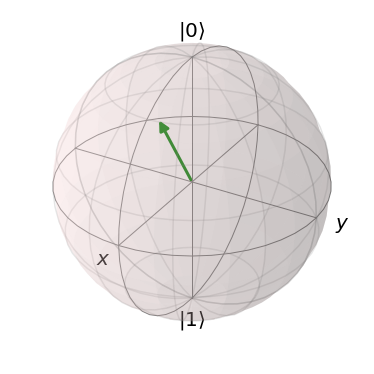

In [50]:
# Add the state to the bloch sphere and display it
bloch_sphere.add_states(q)
bloch_sphere.show()

Now we start seeing some interesting behavior.

Usually the Hadamard just puts the vector pointing between the basis vectors, but this time we see some rotation along the middle of the sphere.

Let's verify the behavior by apply the gate again.

In [51]:
# Apply again
q = T * q

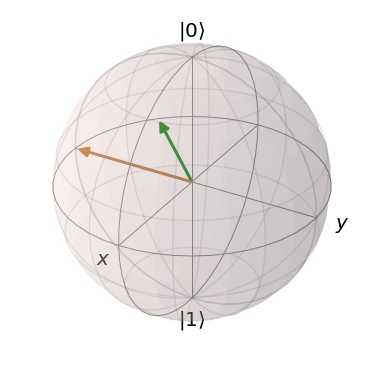

In [52]:
# Add the state and show it
# NOTE: We didn't do the usual bloch_sphere.clear) because we wanted to keep the old state as well
bloch_sphere.add_states(q)
bloch_sphere.show()

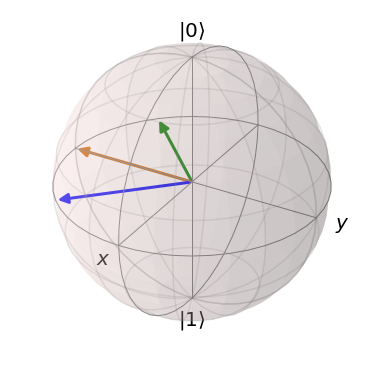

In [53]:
# Do it yet again!
q = T * q
bloch_sphere.add_states(q)
bloch_sphere.show()

How do we interpret this gate? The `T` gate falls in a general class of "Phase Shift Gates" which "rotate" the qubit's vector along some line of latitude on the sphere.

Note that this doesn't change the chances you'll get a $\ket{0}$ or $\ket{1}$ on output, which is determined by the longitudinal proximity of the vector to the $\ket{0}$ or $\ket{1}$ bases. 

Also note that it isn't reversible either (if you put the qubit through it, you won't get your original state back) but this is a bit of a sleight of hand because it didn't change the "chances" or "probability" of getting a value, it just lets you encode another piece of information in the superpostion!

The usage of qubit "phase" will become more important as we move on to Quantum Algorithms but for now, a good understanding of manipulating the qubit superposition and doing so through gates will be enough.

# Next Time

For our next meeting, we'll be looking at how to represent multi-qubit states/operations as well as visualizing such behavior without the Bloch Sphere.